# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2021

# P1

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Alunos:


1.   Stefan Taiguara Couperus Leal - 10414866


# Parte 1

Suponha que duas cidades diferentes tenham te fornecido as temperaturas máximas (celsius) durante diferente dias do ano.
Os dados foram disponibilizados no arquivo "cidades.csv".

As leituras estão em ordem cronológica, porém, o sensor da cidade 1 falhou em alguns dias.

# Questão 1

- a) Para a cidade 1, substitua os valores ausentes pela média das leituras do dia anterior e do dia seguinte.  (1 pt)
- b) Calcule a média e a variância de temperatura no ano para cada cidade. (1 pt)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
cidades_df = pd.read_csv("cidades.csv", index_col=0)
cidades_df

,Temperatura_C1,Temperatura_C2
0,9.404436,35.023209
1,24.284961,21.885523
2,28.210288,37.283873
3,4.463036,20.855662
4,25.764866,22.793028
...,...,...
360,24.985491,21.498136
361,21.459225,37.876996
362,21.590632,24.468403
363,20.679643,21.403285


In [3]:
# código de solução
cidades_df.fillna("nan",inplace=True)
for i in range(len(cidades_df)):
    if (cidades_df['Temperatura_C1'][i] == "nan"):
        cidades_df['Temperatura_C1'][i] = (cidades_df['Temperatura_C1'][i - 1] + cidades_df['Temperatura_C1'][i + 1]) / 2


# Média e variancia para cada cidade

print("Cidade 1")
print(f"Média: {np.mean(cidades_df['Temperatura_C1'])}")
print(f"Variância: {np.var(cidades_df['Temperatura_C1'])}")

print("\n\n\nCidade 2")
print(f"Média: {np.mean(cidades_df['Temperatura_C2'])}")
print(f"Variância: {np.var(cidades_df['Temperatura_C2'])}")

Cidade 1
Média: 24.01263872662399
Variância: 58.03887191610903



Cidade 2
Média: 27.82079587783114
Variância: 47.662194949961105


/tmp/ipykernel_47861/3146638100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cidades_df['Temperatura_C1'][i] = (cidades_df['Temperatura_C1'][i - 1] + cidades_df['Temperatura_C1'][i + 1]) / 2


# Questão 2.

- a) Analisando os valores de temperatura para a cidade 2, pode-se se dizer que os dados são multimodais (mais de uma moda)? Justifique. (1 pt)
    - Sugestão: Visualize os dados através de um histograma.
- b) Determine a quantidade de dias quentes para cada cidade. Consideramos um dia como quente caso sua temperatura máxima tenha sido maior ou igual 25 graus celsius. (1 pt)


Sim, os dados são multimodais como mostra o histograma abaixo
A cidade c1 teve 173 dias quentes
A cidade c2 teve 228 dias quentes


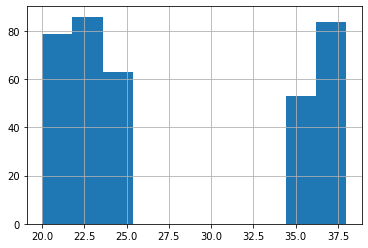

In [4]:
# código de solução
cidades_df["Temperatura_C2"].hist()

print("Sim, os dados são multimodais como mostra o histograma abaixo")


dias_quentes_c2 =  np.count_nonzero(cidades_df["Temperatura_C2"] <= 25)
dias_quentes_c1 = np.count_nonzero(cidades_df["Temperatura_C1"] <= 25)

print(f"A cidade c1 teve {dias_quentes_c1} dias quentes")
print(f"A cidade c2 teve {dias_quentes_c2} dias quentes")

# Questão 3

- a) Faça um boxplot para os valores de temperatura de cada cidade. Em seguida, identifique qual das cidades possui a maior quantidade de outliers nos seus valores de temperatura. Justifique. (1 pt)
- b) Com base no boxplot gerado para a cidade 1, qual é o valor aproximado do quartil Q2? (0.5 pt)
- c) Com base no boxplot gerado para a cidade 2, qual é o valor do quartil Q3? (0.5 pt)

* **a)** A cidade que tem mais outliers é a cidade c1, como se observa pelo boxplot da mesma

Q2 da cidade 1 é 25


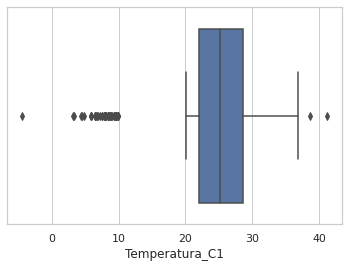

In [5]:
# código de solução
sns.set_theme(style="whitegrid")
ax= sns.boxplot(x=cidades_df["Temperatura_C1"])

print("Q2 da cidade 1 é 25")

O Q3 da cidade 2 é 36


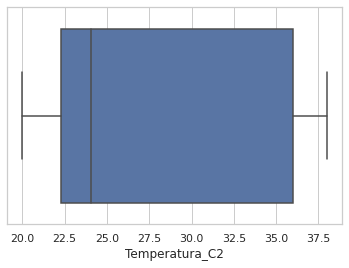

In [6]:
sns.boxplot(x = cidades_df["Temperatura_C2"])
print("O Q3 da cidade 2 é 36")

# Parte 2

O dataset "Breast Cancer Wisconsin" é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio.

In [7]:
# Removendo valores ausentes por simplicidade
data_df = pd.read_csv("breast-cancer-wisconsin.data", na_values='?').dropna()
data_df

,id,clump_thickness,u_cell_size,u_cell_shape,marg_adhesion,epi_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


# Questão 4 
- a) Reduza o número de atributos escolhendo os 3 mais relevantes. Justifique sua resposta. (1 pt)
- b) Comente a distribuição dos valores de **um** dos atributos selecionados. Sugestão: escolha uma forma de visualização (ex: histograma ou boxplot) e comente momentos calculados a partir dos valores. (1 pt)

<AxesSubplot:>

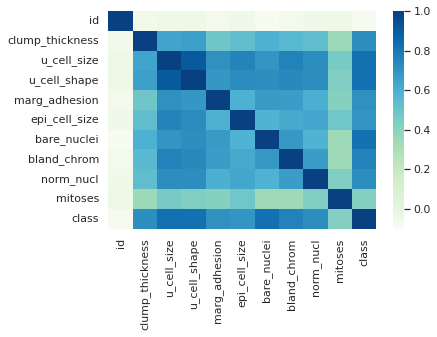

In [8]:
sns.heatmap(data_df.corr(),
            cmap="GnBu"
           )


#correlação, histogramas e comentar os momentos

In [16]:
# u_cell_size, u_cell_shape, bland_chrom

print("Os três atributos que mais pesam no diagnóstico são: u_cell_size, u_cell_shape, bland_chrom")
new_dataset = data_df.loc[:, [ "u_cell_size", "u_cell_shape", "bland_chrom"]]

# sns.boxplot(new_dataset)

Os três atributos que mais pesam no diagnóstico são: u_cell_size, u_cell_shape, bland_chrom


# Questão 5
- a) Considerando os 10 atributos originais (sem o atributo classe), reduza a dimensionalidade dos dados usando a técnica PCA, mantendo uma variância acima de 90%. (1 pt)
- b) Quantos componentes são necessários para manter a variância de 90%? (1 pt)

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
pca = PCA()

In [19]:
values = data_df.drop(columns="class").values
pca.fit(scaler.fit_transform(values))

PCA()

In [20]:
soma = 0

for i, ratio  in enumerate(pca.explained_variance_ratio_):
    soma += ratio * 100
    if(soma >= 90):
        print(f"Para atingir variância acima de 90% é necessário {i+1} atributos")
        break

Para atingir variância acima de 90% é necessário 6 atributos


In [21]:
pca = PCA(n_components=6)
new_values = pca.fit_transform(scaler.fit_transform(values))